In [23]:
%matplotlib inline

In [24]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import patsy
import sklearn.linear_model as linear
sns.set(style="whitegrid")

In [25]:
import random as py_random
import matplotlib.pyplot as plt
import pandas as pd
import models
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint
import zipcodes

In [26]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [27]:
data2 = df[df.price != 0]


data2['zip'] = [x[3:] for x in data2 ['statezip'] ]
data2['location'] = [zipcodes.matching(x) for x in data2['zip'] ]
data2['lat'] = [x[0]['lat'] for x in data2['location'] ]
data2['long'] = [abs(x[0]['long']) for x in data2['location'] ]

data2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,zip,location,lat,long
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,98133,"[{'zip_code': '98133', 'zip_code_type': 'STAND...",47.73,122.34
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,98119,"[{'zip_code': '98119', 'zip_code_type': 'STAND...",47.63,122.37
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,98042,"[{'zip_code': '98042', 'zip_code_type': 'STAND...",47.36,122.10
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,98008,"[{'zip_code': '98008', 'zip_code_type': 'STAND...",47.60,122.11
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,98052,"[{'zip_code': '98052', 'zip_code_type': 'STAND...",47.68,122.12


In [28]:




y = data2['price']
X = data2[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement', 'lat','long']]
col_names = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','lat','long']




from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

validation curve

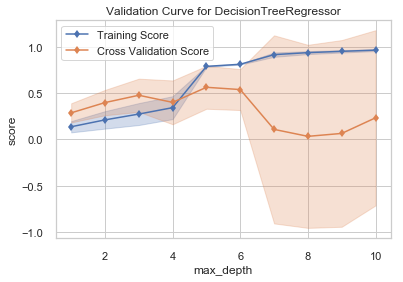

In [43]:
from sklearn.tree import DecisionTreeRegressor
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and poof the visualizer
viz.fit(X, y)
viz.poof()

In [44]:
regressor2 = DecisionTreeRegressor(max_depth = 6)
regressor2.fit(X_train, y_train)

y_pred = regressor2.predict(X_test)

df = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})



In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)  

0.6822698092890911

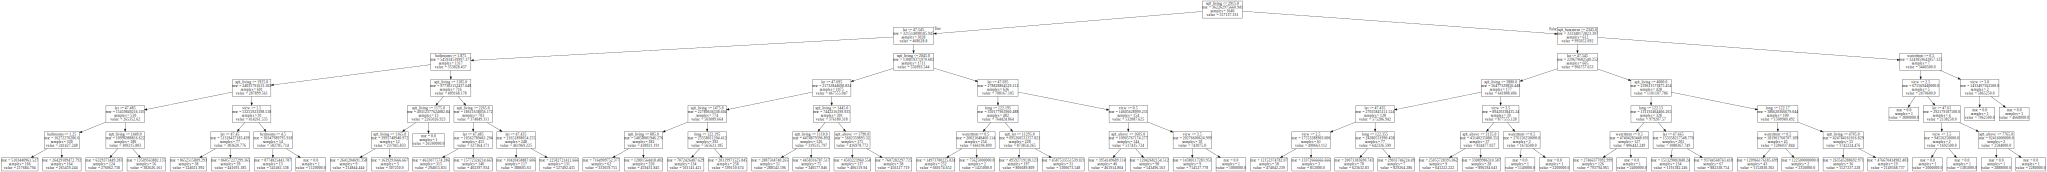

In [39]:
from graphviz import Source
from IPython.display import SVG
from IPython.display import display
from sklearn import tree

import os
os.environ["PATH"] += os.pathsep + 'D:/graphviz/bin/'

graph = Source(tree.export_graphviz(regressor2,out_file = None, filled = None, feature_names = col_names))
display(SVG(graph.pipe(format = 'svg')))